In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width',1000)

In [2]:
import sklearn

In [3]:
wine=pd.read_csv('wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.shape

(1599, 12)

In [5]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
# let's create another column rank
# quality--3,4 rank=3(average)
# quality--5,6 rank=2(good)
# quality--7,8 rank=1(excellent)

In [10]:
wine['rank']=0
for i in range(wine.shape[0]):
    if wine['quality'][i]==3 or wine['quality'][i]==4:
        wine['rank'][i]=3
    if wine['quality'][i]==5 or wine['quality'][i]==6:
        wine['rank'][i]=2
    if wine['quality'][i]==7 or wine['quality'][i]==8:
        wine['rank'][i]=1

In [11]:
wine.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rank
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,2
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,2
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,2


# Basic EDA

In [12]:
wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

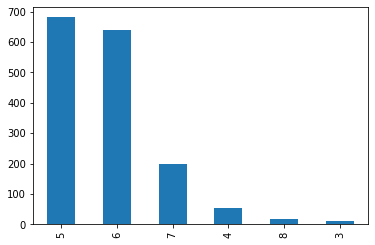

In [29]:
wine.quality.value_counts().plot.bar()

In [13]:
wine.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [15]:
wine['rank'].value_counts()

2    1319
1     217
3      63
Name: rank, dtype: int64

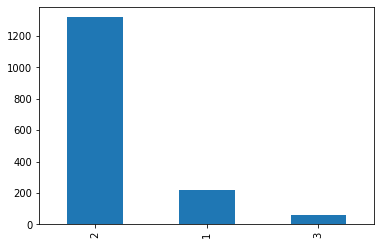

In [30]:
wine['rank'].value_counts().plot.bar()

# Univariate Analysis

In [16]:
col=wine.columns.values
col

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'rank'], dtype=object)

fixed acidity              AxesSubplot(0.125,0.536818;0.0945122x0.343182)
volatile acidity        AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
citric acid             AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
residual sugar          AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
chlorides               AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
free sulfur dioxide     AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
total sulfur dioxide    AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
density                       AxesSubplot(0.125,0.125;0.0945122x0.343182)
pH                         AxesSubplot(0.238415,0.125;0.0945122x0.343182)
sulphates                  AxesSubplot(0.351829,0.125;0.0945122x0.343182)
alcohol                    AxesSubplot(0.465244,0.125;0.0945122x0.343182)
quality                    AxesSubplot(0.578659,0.125;0.0945122x0.343182)
rank                       AxesSubplot(0.692073,0.125;0.0945122x0.343182)
dtype: object

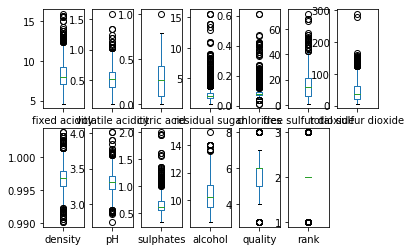

In [17]:
wine.plot(kind='box', subplots=True, layout=(2,7))

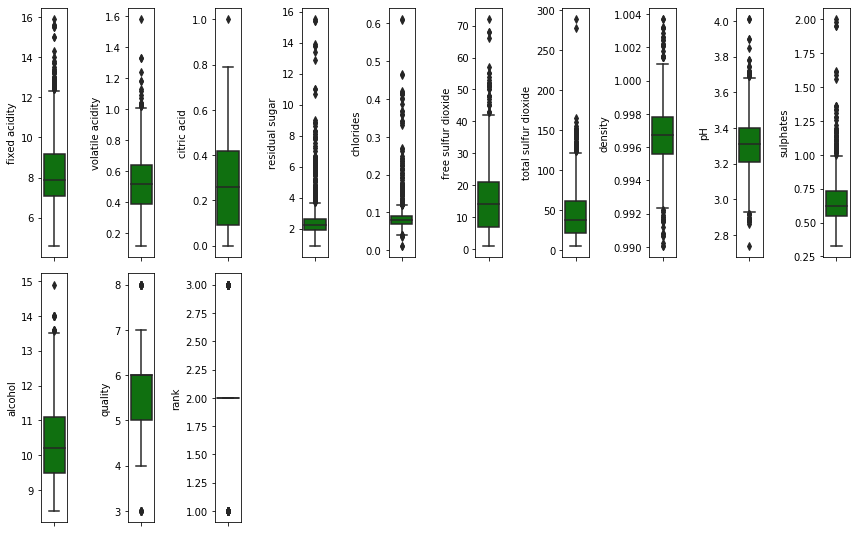

In [20]:
plt.figure(figsize=(12,48))
for i in range(len(col)):
    plt.subplot(13,10,i+1)
    sns.boxplot(wine[col[i]], orient='v', color='green')
    plt.tight_layout()

In [21]:
# there are outliers

<Figure size 432x288 with 0 Axes>

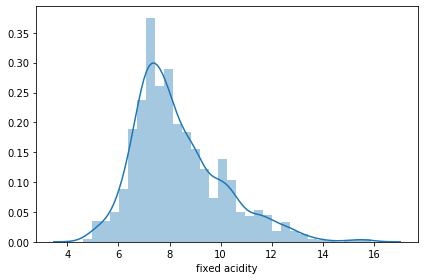

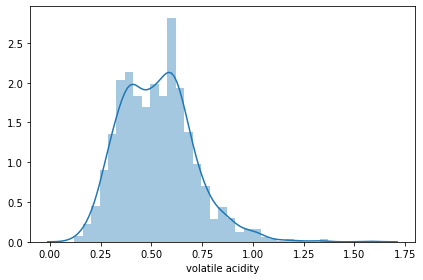

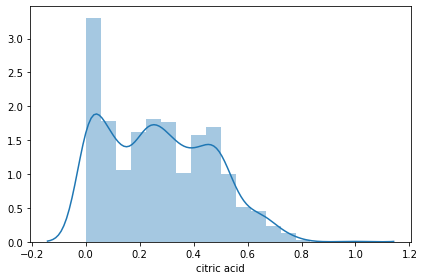

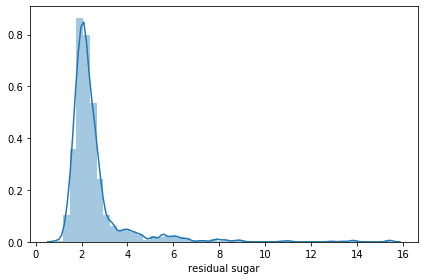

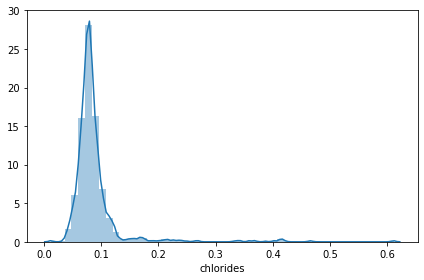

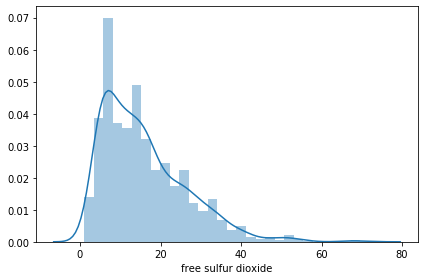

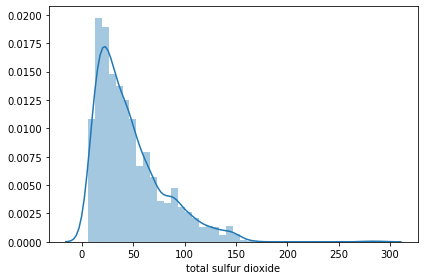

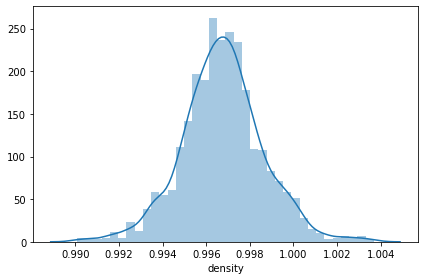

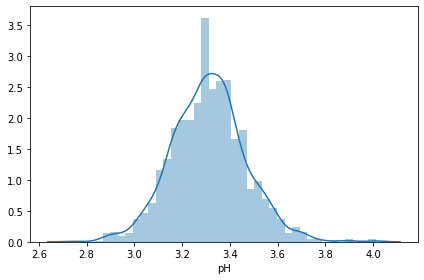

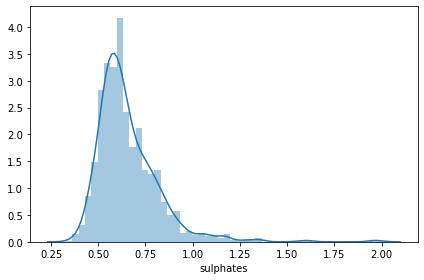

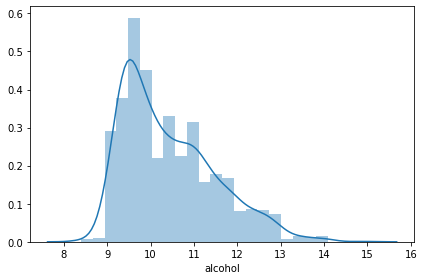

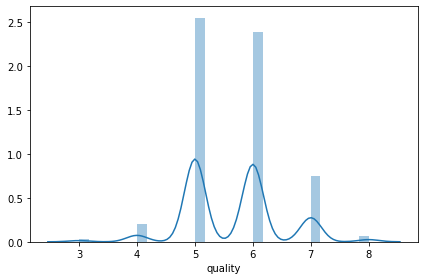

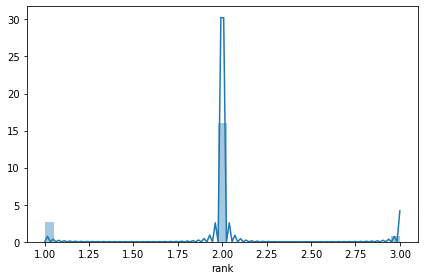

In [22]:
plt.figure()
for i in range(len(col)):
    plt.subplots()
    sns.distplot(wine[col[i]])
    plt.tight_layout()

In [23]:
wine.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
rank                   -0.704067
dtype: float64

In [24]:
# for i in range(len(col)-1):
#     wine[col[i]]=np.log1p(wine[col[i]])

In [25]:
# wine['residual sugar']=np.sqrt(wine['residual sugar'])
# wine['chlorides']=np.sqrt(wine['chlorides'])
# wine['alcohol']=np.sqrt(wine['alcohol'])
# wine['sulphates']=np.sqrt(wine['sulphates'])

In [26]:
# wine['residual sugar']=np.cbrt(wine['residual sugar'])
# wine['chlorides']=np.cbrt(wine['chlorides'])
# wine['alcohol']=np.cbrt(wine['alcohol'])
# wine['sulphates']=np.cbrt(wine['sulphates'])

In [30]:
# exp=(1/10)
# wine['residual sugar']=np.power(wine['residual sugar'], exp)
# wine['chlorides']=np.power(wine['chlorides'], exp)
# wine['alcohol']=np.power(wine['alcohol'], exp)
# wine['sulphates']=np.power(wine['sulphates'], exp)

In [27]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rank
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2


In [28]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rank
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,1.903690
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.407354
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,1.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,2.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,2.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,2.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,3.000000


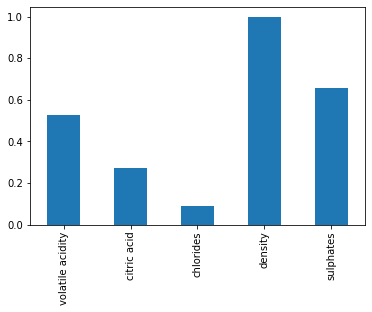

In [32]:
wine.describe().loc['mean',['volatile acidity','citric acid','chlorides','density','sulphates']].plot.bar()

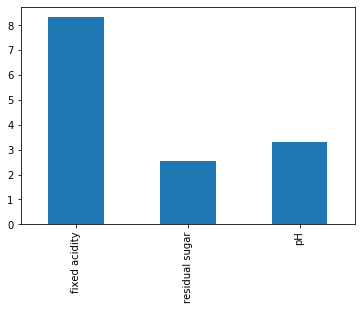

In [33]:
wine.describe().loc['mean',['fixed acidity','residual sugar','pH']].plot.bar()

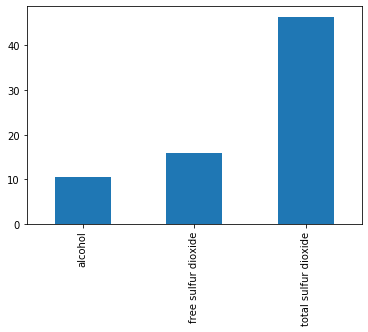

In [34]:
wine.describe().loc['mean',['alcohol','free sulfur dioxide','total sulfur dioxide']].plot.bar()

# Bivariate Analysis

In [35]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rank
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,-0.125886
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,0.333816
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,-0.228930
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,-0.030153
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,0.098829
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,0.025075
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,0.081960
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,0.123566
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,0.093946
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,-0.205409


In [52]:
# volatile acidity is very much negatively correlated with quality

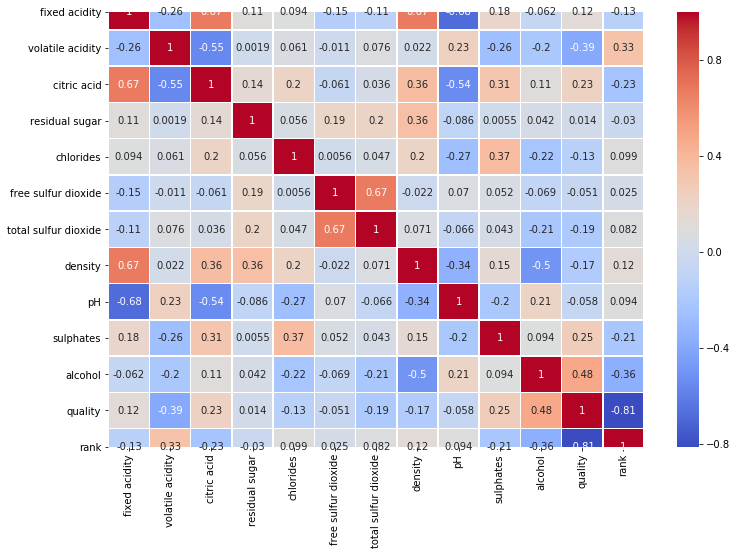

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(wine.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

In [38]:
# alcohol and sulphates have good correlation with quality but they are skewed

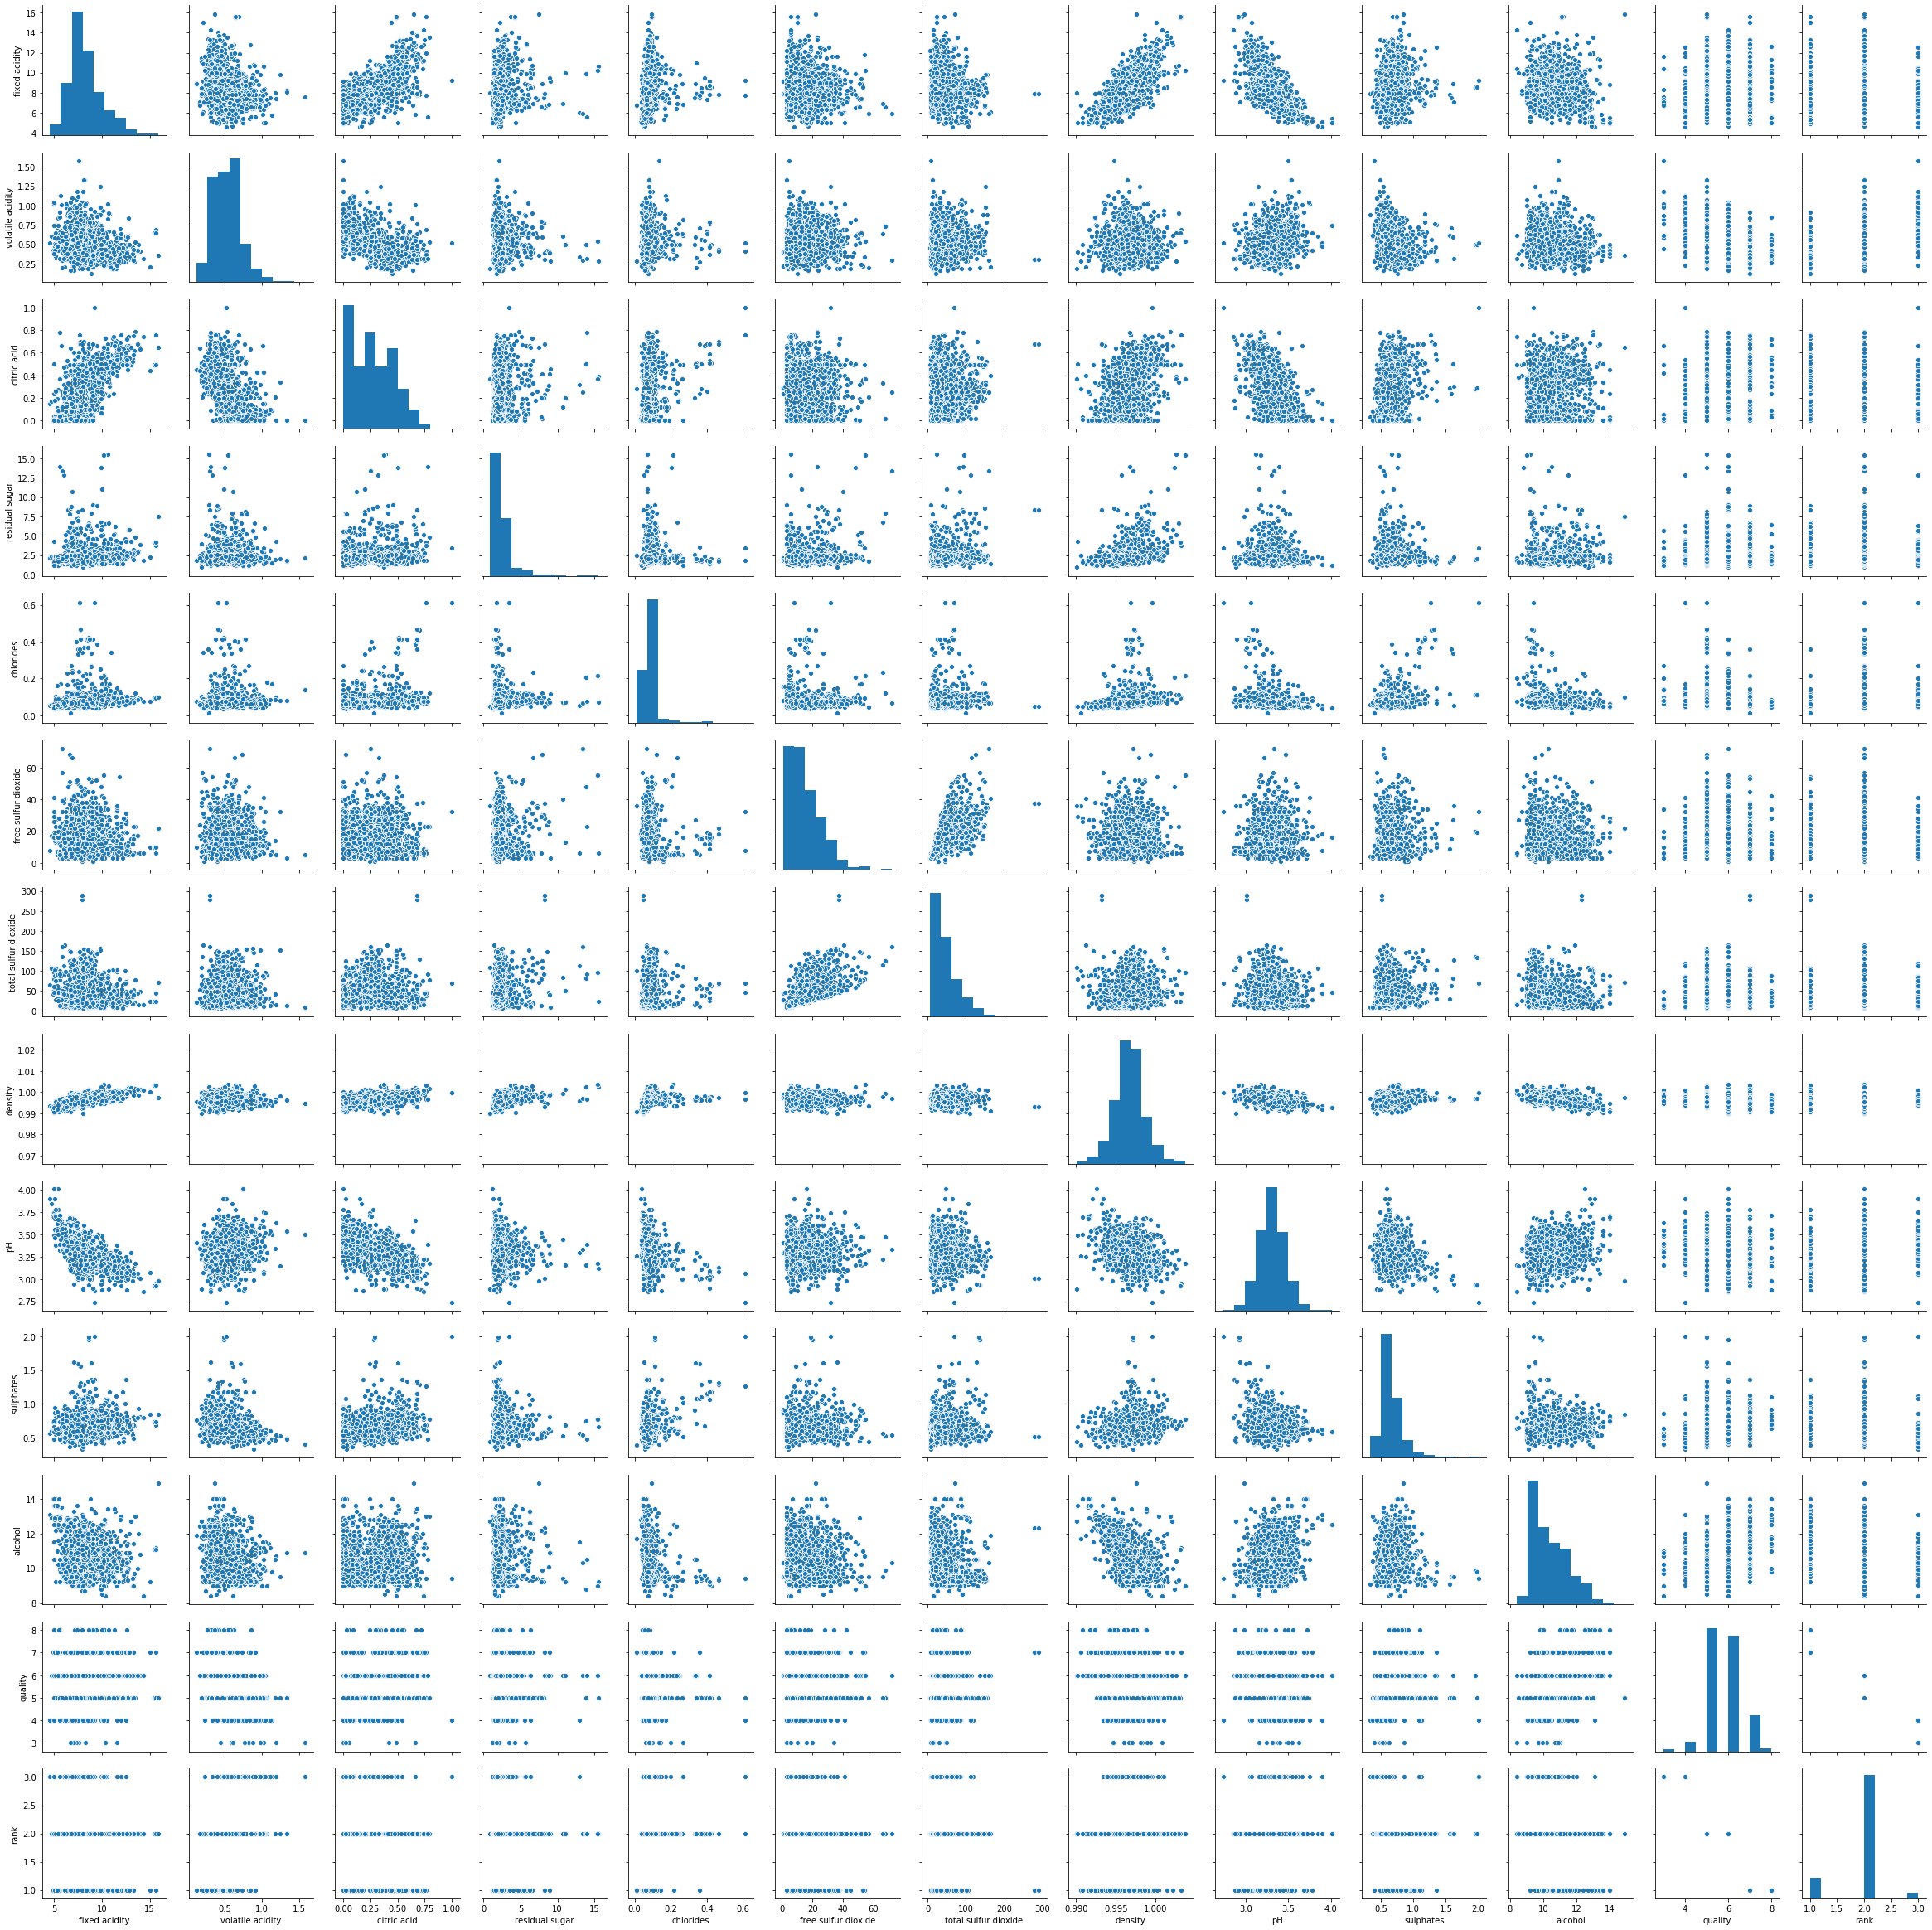

In [40]:
sns.pairplot(wine)

In [41]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'rank'], dtype='object')

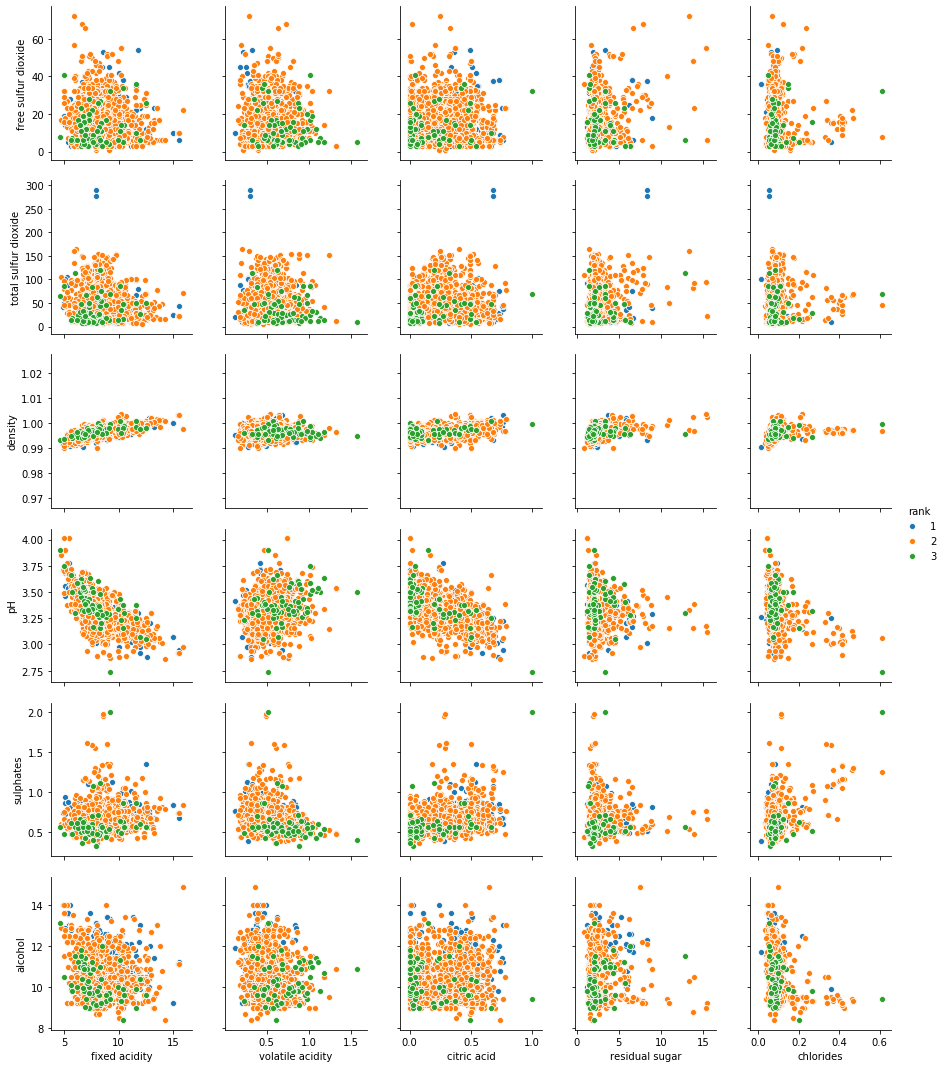

In [43]:
sns.pairplot(wine, x_vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides'], 
             y_vars=['free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'], hue='rank')

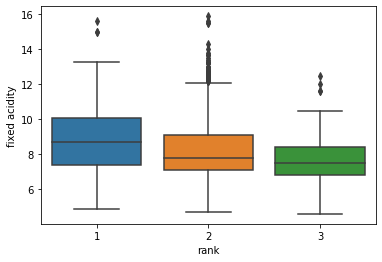

In [45]:
sns.boxplot(data=wine, y='fixed acidity', x='rank')

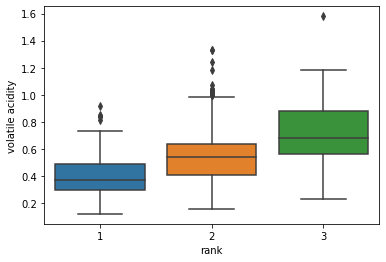

In [46]:
sns.boxplot(data=wine, y='volatile acidity', x='rank')

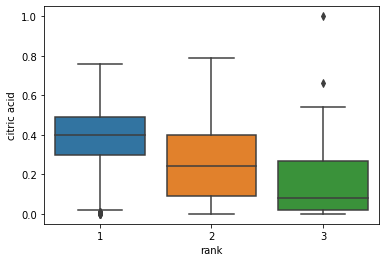

In [47]:
sns.boxplot(data=wine, y='citric acid', x='rank')

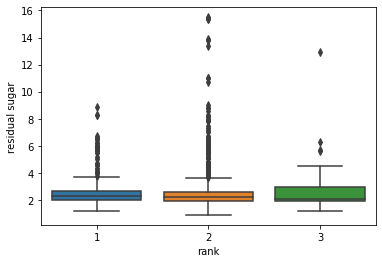

In [48]:
sns.boxplot(data=wine, y='residual sugar', x='rank')

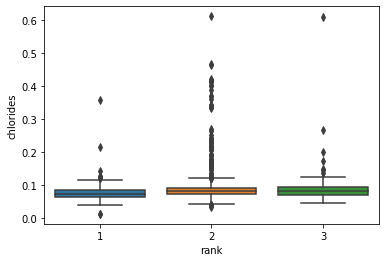

In [49]:
sns.boxplot(data=wine, y='chlorides', x='rank')

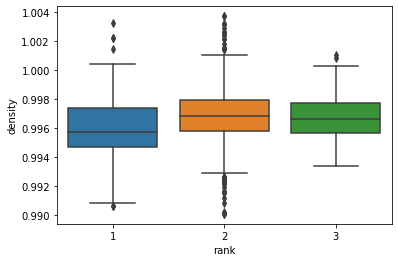

In [50]:
sns.boxplot(data=wine, y='density', x='rank')

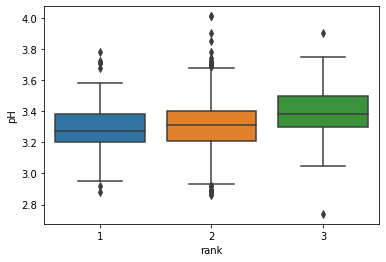

In [51]:
sns.boxplot(data=wine, y='pH', x='rank')

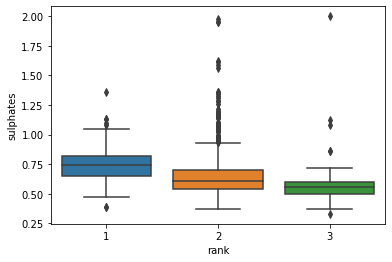

In [52]:
sns.boxplot(data=wine, y='sulphates', x='rank')

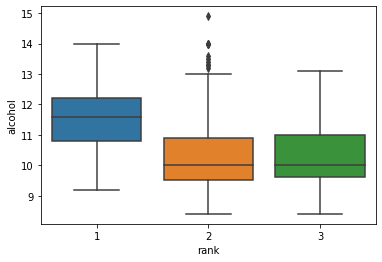

In [53]:
sns.boxplot(data=wine, y='alcohol', x='rank')

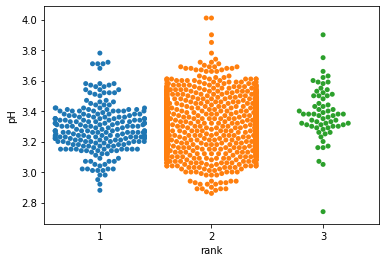

In [54]:
sns.swarmplot(data=wine, y='pH', x='rank')

In [55]:
# There are no missing values

# Outliers handling

In [56]:
from scipy.stats import zscore

In [57]:
z=np.abs(zscore(wine))

In [58]:
wine=wine[(z<3).all(axis=1)]

In [59]:
wine.shape

(1451, 13)

# Data Transformation

In [62]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rank
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2


In [60]:
wine.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
rank                   -0.849028
dtype: float64

In [61]:
# we'll try to remove skewness from fixed acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide,
# sulphates, alcohol

In [65]:
wine['fixed acidity']=np.log(wine['fixed acidity'])

In [71]:
wine['residual sugar']=np.log(wine['residual sugar'])

In [76]:
wine['chlorides']=np.cbrt(wine['chlorides'])

In [81]:
wine['free sulfur dioxide']=np.sqrt(wine['free sulfur dioxide'])

In [85]:
wine['total sulfur dioxide']=np.log(wine['total sulfur dioxide'])

In [90]:
wine['sulphates']=np.cbrt(wine['sulphates'])

In [97]:
wine['alcohol']=np.log(wine['alcohol'])

In [98]:
wine.skew()

fixed acidity           0.377931
volatile acidity        0.380659
citric acid             0.291297
residual sugar          1.227096
chlorides               1.020246
free sulfur dioxide     0.320117
total sulfur dioxide   -0.096908
density                 0.055738
pH                      0.114705
sulphates               0.523901
alcohol                 0.592414
quality                 0.407865
rank                   -0.849028
dtype: float64

In [99]:
# removed skewness as much as possible

In [101]:
# drop quality
wine.drop('quality',axis=1, inplace=True)

In [102]:
# Standard Scaling

In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
scx=StandardScaler()

In [105]:
x=wine.iloc[:, :-1]
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2.001480,0.70,0.00,0.641854,0.423582,3.316625,3.526361,0.9978,3.51,0.824257,2.240710
1,2.054124,0.88,0.00,0.955511,0.461044,5.000000,4.204693,0.9968,3.20,0.879366,2.282382
2,2.054124,0.76,0.04,0.832909,0.451436,3.872983,3.988984,0.9970,3.26,0.866239,2.282382
3,2.415914,0.28,0.56,0.641854,0.421716,4.123106,4.094345,0.9980,3.16,0.833955,2.282382
4,2.001480,0.70,0.00,0.641854,0.423582,3.316625,3.526361,0.9978,3.51,0.824257,2.240710


In [106]:
y=wine.iloc[:,-1]
y.head()

0    2
1    2
2    2
3    2
4    2
Name: rank, dtype: int64

In [111]:
xs=scx.fit_transform(x)
xs=pd.DataFrame(xs, columns=x.columns)

In [112]:
xs.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.512418,1.050914,-1.390400,-0.622313,-0.210193,-0.327753,-0.043663,0.635485,1.375896,-0.622533,-1.033942
1,-0.235682,2.119336,-1.390400,0.458715,0.894816,1.099498,0.950901,0.052390,-0.821951,0.358352,-0.596512
2,-0.235682,1.407054,-1.180831,0.036163,0.611409,0.143956,0.634632,0.169009,-0.396561,0.124707,-0.596512
3,1.666167,-1.442071,1.543569,-0.622313,-0.265236,0.356022,0.789110,0.752103,-1.105544,-0.449918,-0.596512
4,-0.512418,1.050914,-1.390400,-0.622313,-0.210193,-0.327753,-0.043663,0.635485,1.375896,-0.622533,-1.033942


In [113]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2.001480,0.70,0.00,0.641854,0.423582,3.316625,3.526361,0.9978,3.51,0.824257,2.240710
1,2.054124,0.88,0.00,0.955511,0.461044,5.000000,4.204693,0.9968,3.20,0.879366,2.282382
2,2.054124,0.76,0.04,0.832909,0.451436,3.872983,3.988984,0.9970,3.26,0.866239,2.282382
3,2.415914,0.28,0.56,0.641854,0.421716,4.123106,4.094345,0.9980,3.16,0.833955,2.282382
4,2.001480,0.70,0.00,0.641854,0.423582,3.316625,3.526361,0.9978,3.51,0.824257,2.240710


# Model Selection

In [114]:
# the problem is classification with more than 2 classes

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

In [116]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [119]:
def tts(x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    return x_train, x_test, y_train, y_test

In [120]:
def fit(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs, stratify=y)
    m.fit(x_train,y_train)

In [121]:
def get_score(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    train_score=m.score(x_train,y_train)
    pred=m.predict(x_test)
    test_score=accuracy_score(pred,y_test)
    return train_score,test_score

In [122]:
def get_pred(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    return pred

In [123]:
def get_metrics(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(pred,y_test)
    classrep=classification_report(pred,y_test)
    conf=confusion_matrix(pred,y_test)
    return acc, conf, classrep

In [125]:
dt=DecisionTreeClassifier()
svc=SVC()
knn=KNeighborsClassifier()
gnb=GaussianNB()
mnb=MultinomialNB()
gbc=GradientBoostingClassifier() 
rf=RandomForestClassifier()

In [126]:
print('DT ', get_score(dt,x,y))
print('SVC ', get_score(svc,x,y))
print('KNN ', get_score(knn,x,y))
print('GNB ', get_score(gnb,x,y))
print('MNB ', get_score(mnb,x,y))
print('GBC ', get_score(gbc,x,y))
print('RF ', get_score(rf,x,y))

DT  (1.0, 0.8484848484848485)
SVC  (0.8290441176470589, 0.8292011019283747)
KNN  (0.8740808823529411, 0.8126721763085399)
GNB  (0.8134191176470589, 0.837465564738292)
MNB  (0.8290441176470589, 0.8292011019283747)
GBC  (0.96875, 0.8705234159779615)
RF  (0.9862132352941176, 0.8650137741046832)


In [128]:
print('DT ', get_score(dt,xs,y))
print('SVC ', get_score(svc,xs,y))
print('KNN ', get_score(knn,xs,y))
print('GNB ', get_score(gnb,xs,y))
# print('MNB ', get_score(mnb,xs,y))
print('GBC ', get_score(gbc,xs,y))
print('RF ', get_score(rf,xs,y))

DT  (1.0, 0.8292011019283747)
SVC  (0.8731617647058824, 0.8650137741046832)
KNN  (0.8823529411764706, 0.8484848484848485)
GNB  (0.8134191176470589, 0.837465564738292)
GBC  (0.96875, 0.8705234159779615)
RF  (0.9908088235294118, 0.8622589531680441)


In [130]:
# from above two results, the best models are(in ranking)
# gbc with any
# rf with x
# svc with xs
# dt with x
# knn with xs

# Decision Tree

In [131]:
# applying hyper parameter tuning
params_dt={'criterion':['gini','entropy'], 'splitter':['best','random'], 'max_depth':range(2,10,3),
           'max_features':['auto','sqrt','log2']}

In [132]:
from sklearn.model_selection import GridSearchCV

In [133]:
dtg=GridSearchCV(dt,params_dt)
dtg.fit(x,y)
dtg.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'random'}

In [141]:
dt1=DecisionTreeClassifier(criterion= 'gini',
 max_depth= 5,
 max_features= 'log2',
 splitter= 'random')

In [135]:
get_score(dt1,x,y)

(0.84375, 0.8292011019283747)

In [136]:
# the score decreased

In [137]:
params_dt={'criterion':['gini','entropy'], 'max_depth':range(2,12)}

In [138]:
dtg=GridSearchCV(dt,params_dt)
dtg.fit(x,y)
dtg.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [140]:
dt2=DecisionTreeClassifier(criterion= 'gini',
 max_depth= 2)

In [142]:
get_score(dt2,x,y)

(0.8575367647058824, 0.8567493112947658)

In [143]:
# score has improved a little

In [144]:
acc, conf, clas=get_metrics(dt2,x,y)
print(acc)
print(' ')
print(conf)
print(' ')
print(clas)

0.8567493112947658
 
[[ 22  12   0]
 [ 28 289  12]
 [  0   0   0]]
 
              precision    recall  f1-score   support

           1       0.44      0.65      0.52        34
           2       0.96      0.88      0.92       329
           3       0.00      0.00      0.00         0

    accuracy                           0.86       363
   macro avg       0.47      0.51      0.48       363
weighted avg       0.91      0.86      0.88       363



In [145]:
# using BFE and PCA on dt2

In [146]:
# BFE

In [147]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [158]:
sfs1=sfs(dt2, k_features=10, forward=False, verbose=1, cv=5)
sfs1.fit(x,y)
feat_names=list(sfs1.k_feature_names_)
print(feat_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished
Features: 10/10

['fixed acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [159]:
x1bfe=x[feat_names]
get_score(dt2,x1bfe,y)

(0.8575367647058824, 0.8567493112947658)

In [160]:
# the best result is at n=10
# still, it is same as that of dt2 with all features of x
# we won't use BFE

In [161]:
# PCA

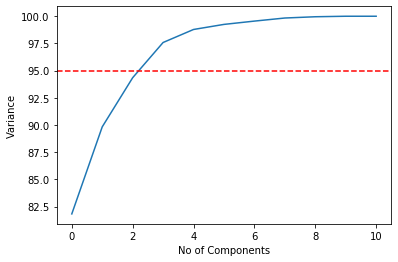

In [162]:
from sklearn.decomposition import PCA
pca=PCA().fit(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('No of Components')
plt.ylabel('Variance')
plt.axhline(y=95, color='r', linestyle='--')
plt.show()

In [166]:
pca=PCA(n_components=7)
x1pca=pd.DataFrame(pca.fit_transform(x))
get_score(dt2,x1pca,y)

(0.8327205882352942, 0.8264462809917356)

In [167]:
# the score is less at n=7,8,9,10
# we won't use PCA either

In [168]:
# the best was dt2 with x(all features)
# let's try to boost it using AdaBoost

In [174]:
ada=AdaBoostClassifier(base_estimator=dt2)

In [170]:
get_score(ada,x,y)

(0.7536764705882353, 0.7768595041322314)

In [171]:
params_ada={'n_estimators':[50,100,250,400], 'learning_rate':[0.01,0.1,1]}
adag=GridSearchCV(ada,params_ada)
adag.fit(x,y)
adag.best_params_

{'learning_rate': 0.01, 'n_estimators': 50}

In [173]:
ada1=AdaBoostClassifier(base_estimator=dt2, learning_rate= 0.01, n_estimators= 50)

In [175]:
get_score(ada1,x,y)

(0.8318014705882353, 0.8292011019283747)

In [178]:
params_ada={'n_estimators':[50,100,150,200,250,300,400]}
adag=GridSearchCV(ada,params_ada)
adag.fit(x,y)
adag.best_params_

{'n_estimators': 50}

In [179]:
# not able to boost results

In [180]:
# cross validation of dt2

In [181]:
from sklearn.model_selection import cross_val_score

In [182]:
score=cross_val_score(dt2,x,y,cv=10)
score.mean(), score.std()

(0.8428474826397258, 0.038406343969035715)

In [183]:
# no over fitting or underfitting

In [282]:
acc, conf, clas=get_metrics(dt2,x,y)
print(acc)
print(' ')
print(conf)
print(' ')
print(clas)

0.8567493112947658
 
[[ 22  12   0]
 [ 28 289  12]
 [  0   0   0]]
 
              precision    recall  f1-score   support

           1       0.44      0.65      0.52        34
           2       0.96      0.88      0.92       329
           3       0.00      0.00      0.00         0

    accuracy                           0.86       363
   macro avg       0.47      0.51      0.48       363
weighted avg       0.91      0.86      0.88       363



# SVC

In [184]:
# use xs with svc

In [190]:
# hyper parameter tuning
params_svc={'kernel':['poly','rbf'],'gamma':['scale','auto'],'C':[0.1,0.5,1]}
svg=GridSearchCV(svc,params_svc)
svg.fit(xs,y)
svg.best_params_

{'C': 0.5, 'gamma': 'auto', 'kernel': 'poly'}

In [191]:
svc1=SVC(kernel='poly',gamma='auto',C=0.5)
get_score(svc1,xs,y)

(0.8777573529411765, 0.8650137741046832)

In [192]:
# no improvement as such

In [193]:
# let's apply BFE and PCA

In [200]:
# BFE
sfs2=sfs(svc1, k_features=8, forward=False, verbose=1, cv=5)
sfs2.fit(xs,y)
feat_names=list(sfs2.k_feature_names_)
print(feat_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.7s finished
Features: 10/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.8s finished
Features: 9/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.5s finished
Features: 8/8

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'density', 'pH', 'sulphates', 'alcohol']


In [201]:
x2bfe=xs[feat_names]
get_score(svc1,x2bfe,y)

(0.8648897058823529, 0.8650137741046832)

In [202]:
# the results have improved slightly

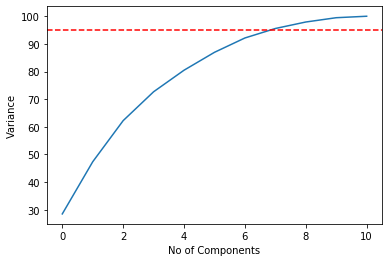

In [203]:
# PCA
pca=PCA().fit(xs)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('No of Components')
plt.ylabel('Variance')
plt.axhline(y=95, color='r', linestyle='--')
plt.show()

In [209]:
pca=PCA(n_components=7)
x2pca=pd.DataFrame(pca.fit_transform(xs))
get_score(svc1,x2pca,y)

(0.8740808823529411, 0.8622589531680441)

In [210]:
# BFE is better out of PCA and BFE
# best is scv1 with x2bfe

In [211]:
# boosting

In [215]:
svc1=SVC(kernel='poly',gamma='auto',C=0.5, probability=True)

In [216]:
ada=AdaBoostClassifier(base_estimator=svc1)

In [217]:
get_score(ada,x2bfe,y)

(0.8290441176470589, 0.8292011019283747)

In [220]:
ada=AdaBoostClassifier(base_estimator=svc1)
params_ada={'n_estimators':[50,100,150], 'learning_rate':[0.01,0.1,1]}
adag=GridSearchCV(ada,params_ada)
adag.fit(x2bfe,y)
adag.best_params_

{'learning_rate': 0.01, 'n_estimators': 50}

In [221]:
ada1=AdaBoostClassifier(base_estimator=svc1, learning_rate= 0.01, n_estimators= 50)
get_score(ada1,x2bfe,y)

(0.8575367647058824, 0.8650137741046832)

In [222]:
# no improvement

In [223]:
# params_ada={'n_estimators':[50,100,150,200,250,300,400]}
# adag=GridSearchCV(ada,params_ada)
# adag.fit(x2bfe,y)
# adag.best_params_

In [224]:
# grid search took more than half an hour
# trying tuning ada boost manually

In [227]:
ada2=AdaBoostClassifier(base_estimator=svc1, learning_rate= 0.01, n_estimators= 100)
get_score(ada2,x2bfe,y)

(0.8575367647058824, 0.8622589531680441)

In [228]:
ada3=AdaBoostClassifier(base_estimator=svc1, learning_rate= 0.01, n_estimators=200)
get_score(ada3,x2bfe,y)

(0.8520220588235294, 0.8457300275482094)

In [229]:
ada4=AdaBoostClassifier(base_estimator=svc1, learning_rate= 0.01, n_estimators= 250)
get_score(ada4,x2bfe,y)

(0.8455882352941176, 0.837465564738292)

In [230]:
ada5=AdaBoostClassifier(base_estimator=svc1, learning_rate= 0.01, n_estimators= 300)
get_score(ada5,x2bfe,y)

(0.8419117647058824, 0.8402203856749312)

In [231]:
ada6=AdaBoostClassifier(base_estimator=svc1, learning_rate= 0.01, n_estimators=400)
get_score(ada6,x2bfe,y)

(0.8400735294117647, 0.837465564738292)

In [232]:
# not able to boost results

In [233]:
# cross validating svc1 with x2bfe
score=cross_val_score(svc1,x2bfe,y,cv=9)
score.mean(), score.std()

(0.8559994485040546, 0.011473352866784392)

In [234]:
# no over fitting or under fitting

In [235]:
acc, conf, clas=get_metrics(svc1,x2bfe,y)
print(acc)
print(' ')
print(conf)
print(' ')
print(clas)

0.8650137741046832
 
[[ 19   6   0]
 [ 31 295  12]
 [  0   0   0]]
 
              precision    recall  f1-score   support

           1       0.38      0.76      0.51        25
           2       0.98      0.87      0.92       338
           3       0.00      0.00      0.00         0

    accuracy                           0.87       363
   macro avg       0.45      0.54      0.48       363
weighted avg       0.94      0.87      0.89       363



# KNN

In [236]:
# use features xs

In [237]:
# hyper parameter tuning
params_knn={'n_neighbors':range(2,14)}
kng=GridSearchCV(knn,params_knn)
kng.fit(xs,y)
kng.best_params_

{'n_neighbors': 10}

In [238]:
knn1=KNeighborsClassifier(n_neighbors=10)
get_score(knn1,xs,y)

(0.8547794117647058, 0.8457300275482094)

In [239]:
# a very slight improvement

In [240]:
params_knn={'n_neighbors':range(2,14),'p':[1,2],'weights':['distance', 'uniform']}
kng=GridSearchCV(knn,params_knn)
kng.fit(xs,y)
kng.best_params_

{'n_neighbors': 12, 'p': 1, 'weights': 'distance'}

In [241]:
knn2=KNeighborsClassifier(n_neighbors=12, p= 1, weights= 'distance')
get_score(knn2,xs,y)

(1.0, 0.8705234159779615)

In [242]:
# improved results

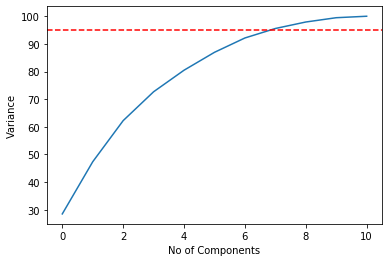

In [243]:
# let's apply PCA on knn2
pca=PCA().fit(xs)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('No of Components')
plt.ylabel('Variance')
plt.axhline(y=95, color='r', linestyle='--')
plt.show()

In [244]:
pca=PCA(n_components=7)
x3pca=pd.DataFrame(pca.fit_transform(xs))
get_score(knn2,x3pca,y)

(1.0, 0.8677685950413223)

In [248]:
# pca=PCA(n_components=8)
# x3pca=pd.DataFrame(pca.fit_transform(xs))
# get_score(knn2,x3pca,y)

In [246]:
pca=PCA(n_components=9)
x3pca=pd.DataFrame(pca.fit_transform(xs))
get_score(knn2,x3pca,y)

(1.0, 0.8760330578512396)

In [247]:
pca=PCA(n_components=10)
x3pca=pd.DataFrame(pca.fit_transform(xs))
get_score(knn2,x3pca,y)

(1.0, 0.8787878787878788)

In [249]:
pca=PCA(n_components=8)
x3pca=pd.DataFrame(pca.fit_transform(xs))
get_score(knn2,x3pca,y)

(1.0, 0.8870523415977961)

In [253]:
knn3=KNeighborsClassifier(n_neighbors=12, p= 1)
get_score(knn2,x3pca,y)

(1.0, 0.8870523415977961)

In [250]:
# ada=AdaBoostClassifier(base_estimator=knn2)
# params_ada={'n_estimators':[50,100,150,200,250,300,400], 'learning_rate':[0.01,0.1,1]}
# adag=GridSearchCV(ada,params_ada)
# adag.fit(x3pca,y)
# adag.best_params_
# grid search took more than half an hour
# trying tuning ada boost manually

In [255]:
# cross validate knn2 with x3pca
score=cross_val_score(knn2,x3pca,y,cv=9)
score.mean(), score.std()

(0.842174414254932, 0.02913984342180358)

In [256]:
# no over fitting or under fitting

In [257]:
acc, conf, clas=get_metrics(knn2,x3pca,y)
print(acc)
print(' ')
print(conf)
print(' ')
print(clas)

0.8870523415977961
 
[[ 32  11   0]
 [ 18 290  12]
 [  0   0   0]]
 
              precision    recall  f1-score   support

           1       0.64      0.74      0.69        43
           2       0.96      0.91      0.93       320
           3       0.00      0.00      0.00         0

    accuracy                           0.89       363
   macro avg       0.53      0.55      0.54       363
weighted avg       0.93      0.89      0.90       363



# RandomForestClassifier

In [259]:
# hyper parameter tuning with x

In [260]:
params_rf={'n_estimators':[50,100,150,200,300]}
rfg=GridSearchCV(rf,params_rf)
rfg.fit(x,y)
rfg.best_params_

{'n_estimators': 50}

In [262]:
rf1=RandomForestClassifier(n_estimators=50)
get_score(rf1,x,y)

(1.0, 0.8925619834710744)

In [263]:
# result has improved

In [264]:
rf=RandomForestClassifier(n_jobs=-1)

In [265]:
# more tuning
params_rf={'n_estimators':[50,100,150,200,300],'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2']}
rfg=GridSearchCV(rf,params_rf)
rfg.fit(x,y)
rfg.best_params_

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 200}

In [266]:
rf2=RandomForestClassifier(n_jobs=-1, criterion= 'entropy', max_features= 'sqrt', n_estimators= 200)

In [267]:
get_score(rf2,x,y)

(1.0, 0.9008264462809917)

In [268]:
# result has improved further

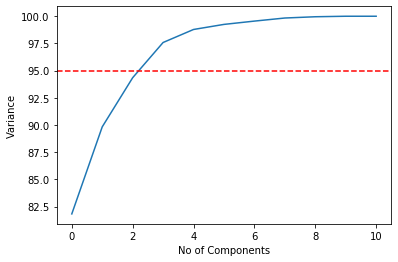

In [269]:
# let's apply PCA on rf2
pca=PCA().fit(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('No of Components')
plt.ylabel('Variance')
plt.axhline(y=95, color='r', linestyle='--')
plt.show()

In [270]:
pca=PCA(n_components=7)
x4pca=pd.DataFrame(pca.fit_transform(x))
get_score(rf2,x4pca,y)

(1.0, 0.8815426997245179)

In [271]:
pca=PCA(n_components=8)
x4pca=pd.DataFrame(pca.fit_transform(x))
get_score(rf2,x4pca,y)

(1.0, 0.8705234159779615)

In [272]:
pca=PCA(n_components=9)
x4pca=pd.DataFrame(pca.fit_transform(x))
get_score(rf2,x4pca,y)

(1.0, 0.8898071625344353)

In [273]:
pca=PCA(n_components=10)
x4pca=pd.DataFrame(pca.fit_transform(x))
get_score(rf2,x4pca,y)

(1.0, 0.8898071625344353)

In [274]:
pca=PCA(n_components=6)
x4pca=pd.DataFrame(pca.fit_transform(x))
get_score(rf2,x4pca,y)

(1.0, 0.8512396694214877)

In [275]:
# there is no use of applying PCA

In [276]:
# cross validating rf2
score=cross_val_score(rf2,x,y,cv=9)
score.mean(), score.std()

(0.8400830874123751, 0.02546214154195126)

In [277]:
# no over fitting or under fitting

In [278]:
acc, conf, clas=get_metrics(rf2,x,y)
print(acc)
print(' ')
print(conf)
print(' ')
print(clas)

0.9035812672176309
 
[[ 35   8   0]
 [ 15 293  12]
 [  0   0   0]]
 
              precision    recall  f1-score   support

           1       0.70      0.81      0.75        43
           2       0.97      0.92      0.94       320
           3       0.00      0.00      0.00         0

    accuracy                           0.90       363
   macro avg       0.56      0.58      0.57       363
weighted avg       0.94      0.90      0.92       363



In [279]:
# let's once check the distribution of rank in y_test
xtr,xte,ytr,yte=tts(x,y)

In [280]:
yte.value_counts()

2    301
1     50
3     12
Name: rank, dtype: int64

In [281]:
ytr.value_counts()

2    902
1    151
3     35
Name: rank, dtype: int64

# GradientBoostingClassifier

In [284]:
gbc=GradientBoostingClassifier()

In [285]:
params_gbc={'learning_rate':[0.01,0.1,1],
           'n_estimators':[50,100,150,200,300]}
gbg=GridSearchCV(gbc,params_gbc)
gbg.fit(x,y)
gbg.best_params_

{'learning_rate': 0.01, 'n_estimators': 150}

In [286]:
gbc1=GradientBoostingClassifier(learning_rate= 0.01, n_estimators= 150)
get_score(gbc1,x,y)

(0.8795955882352942, 0.8677685950413223)

In [288]:
gbc_=GradientBoostingClassifier(learning_rate= 0.01)
params_gbc={
           'n_estimators':[50,100,150,200,300],'max_features':['auto','sqrt','log2']}
gbg=GridSearchCV(gbc_,params_gbc)
gbg.fit(x,y)
gbg.best_params_

{'max_features': 'auto', 'n_estimators': 150}

In [289]:
gbc2=GradientBoostingClassifier(learning_rate= 0.01, n_estimators= 150, max_features= 'auto')
get_score(gbc2,x,y)

(0.8795955882352942, 0.8677685950413223)

In [290]:
# no significant change
# use untuned

In [291]:
# let's use pca

In [293]:
pca=PCA(n_components=7)
x5pca=pd.DataFrame(pca.fit_transform(x))
get_score(gbc,x5pca,y)

(0.96875, 0.8705234159779615)

In [294]:
pca=PCA(n_components=8)
x5pca=pd.DataFrame(pca.fit_transform(x))
get_score(gbc,x5pca,y)

(0.9770220588235294, 0.8539944903581267)

In [295]:
pca=PCA(n_components=9)
x5pca=pd.DataFrame(pca.fit_transform(x))
get_score(gbc,x5pca,y)

(0.9806985294117647, 0.8650137741046832)

In [296]:
pca=PCA(n_components=10)
x5pca=pd.DataFrame(pca.fit_transform(x))
get_score(gbc,x5pca,y)

(0.9834558823529411, 0.8705234159779615)

In [297]:
# no improvement

In [298]:
# let's cross validate gbc with x
score=cross_val_score(gbc,x,y,cv=9)
score.mean(), score.std()

(0.8283806274788438, 0.047611150930654524)

In [299]:
# no over fitting or under fitting

In [300]:
acc, conf, clas=get_metrics(gbc,x,y)
print(acc)
print(' ')
print(conf)
print(' ')
print(clas)

0.8732782369146006
 
[[ 33  15   0]
 [ 17 282  10]
 [  0   4   2]]
 
              precision    recall  f1-score   support

           1       0.66      0.69      0.67        48
           2       0.94      0.91      0.92       309
           3       0.17      0.33      0.22         6

    accuracy                           0.87       363
   macro avg       0.59      0.64      0.61       363
weighted avg       0.89      0.87      0.88       363



In [301]:
# the best model is random forest in terms of accuracy
# but looking at precision and recall, gbc is better

# Saving the model

In [304]:
pred=get_pred(gbc,x,y)
predictions=pd.DataFrame(pred)
predictions.to_csv('pred_wine.csv')

In [305]:
import joblib

In [306]:
fit(gbc,x,y)

In [307]:
joblib.dump(gbc,'gbc_wine.pkl')

['gbc_wine.pkl']